### easy

In [419]:
import sympy
import time
from math import gcd
import matplotlib.pyplot as plt
from itertools import product
from statistics import mean

In [420]:
def is_palindrome(n):
    s = str(n)
    return s == s[::-1]


def eratosphenes_sieve(r):
    multiples = set()
    primes = set()
    
    for i in range(2, r + 1):
        if i not in multiples:
            primes.add(i)
            for j in range(i ** 2, r + 1, i):
                multiples.add(j)
    return primes

In [421]:
def palindromic_squares_and_circular_primes() -> tuple[list[int], list[int]]:
    palindromic_sq = []
    for n in range(1, 10 ** 5):
        if is_palindrome(n) and is_palindrome(n ** 2):
            palindromic_sq.append(n)
    
    circular_primes = []
    primes = eratosphenes_sieve(10 ** 6)
    for n in primes:
        s = str(n)
        cycles = sum(int(s[i:] + s[:i]) in primes for i in range(len(s)))
        if cycles == len(s):
            circular_primes.append(n)
            
    return (palindromic_sq, circular_primes)


print(*palindromic_squares_and_circular_primes(), sep='\n')

[1, 2, 3, 11, 22, 101, 111, 121, 202, 212, 1001, 1111, 2002, 10001, 10101, 10201, 11011, 11111, 11211, 20002, 20102]
[2, 3, 5, 7, 11, 13, 17, 31, 37, 71, 73, 79, 97, 113, 131, 197, 199, 311, 337, 373, 393919, 719, 733, 919, 971, 991, 1193, 919393, 1931, 3119, 3779, 7793, 7937, 9311, 9377, 11939, 933199, 19391, 19937, 939193, 939391, 37199, 39119, 319993, 193939, 199933, 331999, 71993, 993319, 999331, 91193, 93719, 93911, 99371, 391939]


In [422]:
def palindromic_cubes_and_palindromic_primes() -> tuple[list[int], list[int]]:
    palindromic_cubes = []
    for n in range(1, 10 ** 5):
        if is_palindrome(n) and is_palindrome(n ** 3):
            palindromic_cubes.append(n)
            
    palindromic_primes = []
    primes = eratosphenes_sieve(10 ** 4)
    for p in primes:
        if is_palindrome(p):
            palindromic_primes.append(p)
    return (palindromic_cubes, palindromic_primes)


print(*palindromic_cubes_and_palindromic_primes(), sep='\n')

[1, 2, 7, 11, 101, 111, 1001, 10001, 10101, 11011]
[2, 3, 5, 7, 11, 101, 131, 151, 181, 191, 313, 353, 373, 383, 727, 757, 787, 797, 919, 929]


In [423]:
def generate_primes(a, b):
    digits = f'{a}{b}'
    length = 1
    gen_primes = []
    while len(gen_primes) < 100:
        for p in product(digits, repeat=length):
            if p[0] == '0':
                continue
            
            num = int(''.join(p))
            if sympy.isprime(num):
                gen_primes.append(num)
                
            if len(gen_primes) == 100: 
                break
        length += 1
    return gen_primes


def primes_with_two_digits() -> dict[str, list[int]]:
    result = {}
    pairs = [(1, 3), (1, 5), (1, 7), (1, 9)]
    for i, j in pairs:
        key = f'{i}{j}'
        primes_list = generate_primes(i, j)
        result[key] = primes_list
    return result


d = dict(primes_with_two_digits().items())
for s, val in primes_with_two_digits().items(): 
    distance = []
    for i in range(1, len(val)):
        distance.append(val[i] - val[i - 1])
    d[s] = (round(mean(distance)), distance, val)
    print(f'среднее расстояний между числами: {round(mean(distance))}, {s}: {val}')
print('числа, встречающиеся реже всех:', max(d.items(), key=lambda x: x[1][0])[0])

среднее расстояний между числами: 1122355, 13: [3, 11, 13, 31, 113, 131, 311, 313, 331, 3313, 3331, 11113, 11131, 11311, 13313, 13331, 31333, 33113, 33311, 33331, 113111, 113131, 131111, 131113, 131311, 311111, 313133, 313331, 313333, 331333, 333131, 333331, 1111333, 1131113, 1131131, 1131133, 1131331, 1133131, 1133333, 1311131, 1311311, 1313311, 1331333, 1333133, 1333313, 1333331, 3111131, 3111313, 3111331, 3113111, 3113333, 3131113, 3131311, 3133111, 3133331, 3311131, 3331331, 3331333, 3333131, 3333133, 3333311, 3333313, 3333331, 11111131, 11111311, 11113111, 11131111, 11311133, 11313311, 11313331, 11331311, 11333111, 11333131, 13111333, 13131133, 13131331, 13133111, 13133311, 13311113, 13311313, 31111313, 31113113, 31113311, 31133131, 31311113, 31311131, 31333333, 33111311, 33113111, 33113131, 33313333, 33333133, 33333331, 111111113, 111111131, 111111313, 111111331, 111113111, 111113113, 111113131]
среднее расстояний между числами: 15267793, 15: [5, 11, 151, 1151, 1511, 11551, 15511

[(3, 5), (5, 7), (11, 13), (17, 19), (29, 31), (41, 43), (59, 61), (71, 73), (101, 103), (107, 109), (137, 139), (149, 151), (179, 181), (191, 193), (197, 199), (227, 229), (239, 241), (269, 271), (281, 283), (311, 313), (347, 349), (419, 421), (431, 433), (461, 463), (521, 523), (569, 571), (599, 601), (617, 619), (641, 643), (659, 661), (809, 811), (821, 823), (827, 829), (857, 859), (881, 883), (1019, 1021), (1031, 1033), (1049, 1051), (1061, 1063), (1091, 1093), (1151, 1153), (1229, 1231), (1277, 1279), (1289, 1291), (1301, 1303), (1319, 1321), (1427, 1429), (1451, 1453), (1481, 1483), (1487, 1489), (1607, 1609), (1619, 1621), (1667, 1669), (1697, 1699), (1721, 1723), (1787, 1789), (1871, 1873), (1877, 1879), (1931, 1933), (1949, 1951), (1997, 1999), (2027, 2029), (2081, 2083), (2087, 2089), (2111, 2113), (2129, 2131), (2141, 2143), (2237, 2239), (2267, 2269), (2309, 2311), (2339, 2341), (2381, 2383), (2549, 2551), (2591, 2593), (2657, 2659), (2687, 2689), (2711, 2713), (2729, 2731

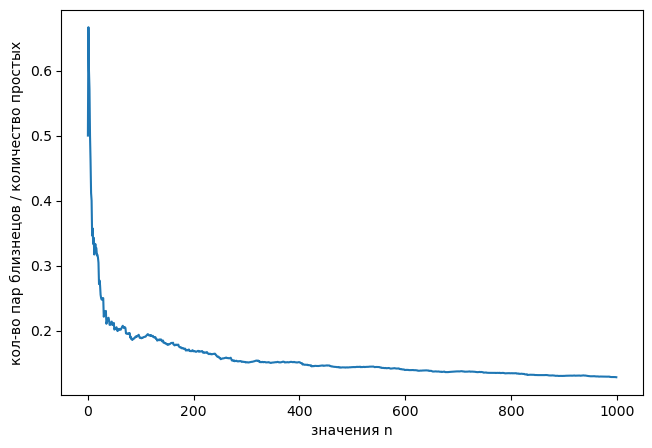

In [424]:
def generate_pair_primes(limit_length=1000) -> tuple[list[tuple[int, int]], list[float]]:
    num = 3
    ratios = []
    prime_pairs = []
    while len(prime_pairs) < limit_length:
        if sympy.isprime(num) and sympy.isprime(num + 2):
            prime_pairs.append((num, num + 2))
            ratios.append(float(len(prime_pairs) / sympy.primepi(num)))
        num += 2
    return prime_pairs, ratios


result = generate_pair_primes()
print(*result, sep='\n')

plt.figure(figsize=(7.5, 5))
plt.plot(result[1])
plt.xlabel('значения n')
plt.ylabel('кол-во пар близнецов / количество простых')
plt.show()


In [425]:
def factorial_plus_one_factors() -> dict[int, dict[int, int]]:
    result = {}
    for n in range(2, 51):
        factorial_plus_one = sympy.factorial(n) + 1
        factors = sympy.factorint(factorial_plus_one)
        result[n] = factors
    return result


d = factorial_plus_one_factors()
max_distinct_factors = len(max(d.items(), key=lambda x: len(x[1].keys()))[1].keys())
print('максимальное количество различных простых делителей среди всех n! + 1:', max_distinct_factors)

big_factors = []
for n, factors in d.items():
    large_factors = [x for x in factors if x > 10**6]
    if large_factors:
        big_factors.append((n, large_factors))
print(*big_factors)

максимальное количество различных простых делителей среди всех n! + 1: 7
(11, [39916801]) (12, [2834329]) (13, [75024347]) (14, [3790360487]) (15, [46271341]) (16, [1059511]) (17, [1000357]) (18, [123610951]) (19, [1713311273363831]) (20, [20639383, 117876683047]) (21, [2703875815783]) (22, [93799610095769647]) (23, [148139754736864591]) (24, [765041185860961084291]) (25, [38681321803817920159601]) (26, [237649652991517758152033]) (27, [10888869450418352160768000001]) (28, [10513391193507374500051862069]) (29, [mpz(218568437), 2778942057555023489]) (30, [1080941, 7719068319927551]) (31, [3038779, 110714485281307653167]) (32, [61146083, 2889419049474073777]) (33, [143446529, 101002716748738111]) (34, [4379593820587205958191075783529691]) (35, [340825649, 32731815563800396289317]) (36, [165202043, 669043459524628666916941]) (37, [13763753091226345046315979581580902400000001]) (38, [mpz(14029308060317546154181), 37280713718589679646221]) (39, [mpz(146102648914939), mpz(57554485363), 30705

In [426]:
def euler_phi_brute_force(n: int) -> int:
    count = 0
    for k in range(1, n + 1):
        if gcd(n, k) == 1:
            count += 1
    return count


def euler_phi_prime_factorization(n) -> int:
    result = n
    factors = sympy.factorint(n)
    for prime in factors.keys():
        result *= (1 - 1 / prime)
    return result


test_nums = [10, 50, 100, 200, 500, 1000]
print("n, брутфорс, разложение на простые множители, использование sympy")
for n in test_nums:
    start = time.perf_counter()
    euler_phi_brute_force(n)
    bf_time = (time.perf_counter() - start) * 1000
    
    start = time.perf_counter()
    euler_phi_prime_factorization(n)
    pf_time = (time.perf_counter() - start) * 1000
    
    start = time.perf_counter()
    sympy.totient(n)
    sp_time = (time.perf_counter() - start) * 1000
    
    print(f"{n} {bf_time} {pf_time} {sp_time}")

n, брутфорс, разложение на простые множители, использование sympy
10 0.0055109994718804955 0.02605500048957765 0.06814699918322731
50 0.004202000127406791 0.009553001291351393 0.08719799916434567
100 0.007365000783465803 0.010192999980063178 0.12106800022593234
200 0.010715000826166943 0.004444000296643935 0.05587499981629662
500 0.02964000123029109 0.0047909998102113605 0.05579599928751122
1000 0.06383099935192149 0.004571000317810103 0.07163800000853371


### группы

In [427]:
import random
from math import gcd
from sage.all import CyclicPermutationGroup, SymmetricGroup, Permutation, Zmod, prod
from sage.groups.finitely_presented_named import CyclicPresentation

In [428]:
N = 501990 % 20

m = 4 + (N % 5)
n = 2 + (N % 10)
k = 1 + (N % 7)

n1 = N % 6
n2 = (N + 1) % 6
n3 = (N + 2) % 6

p = [29, 31, 37, 23, 19][N % 5]
s = [5, 4, 3, 17, 15][N % 5]
r = [59, 60, 38, 45, 44][N % 5]
t = [9, 8, 7, 12, 14][N % 5]

In [429]:
def subgroups_of_Sm(N: int, m: int) -> dict:
    symmetric_group = SymmetricGroup(m)
    subgroups = symmetric_group.subgroups()
    subgroups_cnt = len(subgroups)
    rndm_subroup = symmetric_group.random_element()
    
    group_of_index = subgroups[N % subgroups_cnt]
    
    left_coset = symmetric_group.cosets(group_of_index, side='left')
    right_coset = symmetric_group.cosets(group_of_index, side='right')
    
    subgroup_indx = symmetric_group.order() / group_of_index.order()
    is_normal = group_of_index.is_normal(symmetric_group)
    
    return {
        'количество подгрупп': subgroups_cnt,
        'случайная группа': rndm_subroup,
        'подгруппа для которой вычисляются классы': list(group_of_index),
        'левый смежный класс': left_coset,
        'правый смежный класс': right_coset,
        'индекс подгруппы': subgroup_indx,
        'нормальность подгруппы': ['не является нормальной', 'является нормальной'][is_normal]
    }


for s, val in subgroups_of_Sm(N, m).items():   
    print(f"{s}: {val}")

количество подгрупп: 30
случайная группа: (1,3,2,4)
подгруппа для которой вычисляются классы: [(), (2,4,3), (2,3,4)]
левый смежный класс: [[(), (2,3,4), (2,4,3)], [(3,4), (2,3), (2,4)], [(1,2), (1,3,4,2), (1,4,3,2)], [(1,2)(3,4), (1,3,2), (1,4,2)], [(1,2,3), (1,3)(2,4), (1,4,3)], [(1,2,3,4), (1,3,2,4), (1,4)], [(1,2,4,3), (1,3), (1,4,2,3)], [(1,2,4), (1,3,4), (1,4)(2,3)]]
правый смежный класс: [[(), (2,3,4), (2,4,3)], [(3,4), (2,4), (2,3)], [(1,2), (1,2,3,4), (1,2,4,3)], [(1,2)(3,4), (1,2,4), (1,2,3)], [(1,3,2), (1,3,4), (1,3)(2,4)], [(1,3,4,2), (1,3,2,4), (1,3)], [(1,4,3,2), (1,4), (1,4,2,3)], [(1,4,2), (1,4)(2,3), (1,4,3)]]
индекс подгруппы: 8
нормальность подгруппы: не является нормальной


In [430]:
def element_powers_in_Sm(N: int, m: int, n1 : int, n2: int, n3: int) -> dict:
    symmetric_group = SymmetricGroup(m)
    g = symmetric_group[N % symmetric_group.order()]
    g_order = g.order()
    gn1_ord = g_order / gcd(n1, g_order)
    gn2_ord = g_order / gcd(n2, g_order)
    gn3_ord = g_order / gcd(n3, g_order)
    
    return {
        'порядок элемента g^n1' : gn1_ord,
        'порядок элемента g^n2' : gn2_ord,
        'порядок элемента g^n3' : gn3_ord,
        'порядок циклической подгруппы g^n1' : gn1_ord,
        'порядок циклической подгруппы g^n2' : gn2_ord,
        'порядок циклической подгруппы g^n3' : gn3_ord,
    }


for s, val in element_powers_in_Sm(N, m, n1, n2, n3).items():   
    print(f"{s}: {val}")

порядок элемента g^n1: 3
порядок элемента g^n2: 3
порядок элемента g^n3: 1
порядок циклической подгруппы g^n1: 3
порядок циклической подгруппы g^n2: 3
порядок циклической подгруппы g^n3: 1


In [431]:
def solve_sigma_power_eq(N: int, m: int, n: int) -> dict:
    symmetric_group = SymmetricGroup(m)
    result = Permutation([x for x in range(1, m)])
    roots = [x for x in result.nth_roots(n) if x in symmetric_group]
    
    return {
        'количество решений' : len(roots),
        'случайные решения' : random.choices(roots, k=3)
    }


for s, val in solve_sigma_power_eq(N, m, n).items():   
    print(f"{s}: {val}")

количество решений: 4
случайные решения: [[3, 2, 1], [1, 2, 3], [1, 3, 2]]


In [432]:
def elements_of_order_k_in_cyclic_group(N: int, m: int, k: int) -> dict:
    group = CyclicPresentation(m)

    roots = [g for g in group if (g ** k) == group.one()]
    order_k = [g for g in group if g.order() == k]

    return {
        'элементы g^k=e' : roots,
        'элементы порядка k' : order_k
    }
    
    
for s, val in elements_of_order_k_in_cyclic_group(N, m, k).items():   
    print(f"{s}: {val}")

элементы g^k=e: [1, a, a^3, a^2]
элементы порядка k: [a, a^3]


In [433]:
def subgroups_of_Zm_star(N: int, m: int) -> list:
    zm_gr = Zmod(m).unit_group()
    f = lambda h, h1: [a ** b for a, b in zip(h.gens(), h1.list())]
    mult_subgroups = [[prod(f(h, h1), zm_gr.one()) for h1 in h] for h in zm_gr.subgroups()]
    return [[x.value() for x in li] for li in mult_subgroups]


print(f'подгруппы мультипликативной группы Z{m}:', subgroups_of_Zm_star(N, m))

подгруппы мультипликативной группы Z4: [[1, 3], [1]]


In [434]:
def order_of_sr(N: int, p: int, r: int) -> int:
    zp_gr = Zmod(p).unit_group()
    element = zp_gr.gen() ** r
    return element.order()


print('порядок элемента s^r:', order_of_sr(N, p, r))

порядок элемента s^r: 28


In [435]:
def order_and_primitivity_of_t(N: int, p: int, t: int) -> dict:
    zp_gr = Zmod(p).unit_group()
    element = zp_gr.gen() ** t
    return {
        'порядок элемента t' : element.order(),
        'является ли t образующим' : ['нет', 'да'][element.order() == zp_gr.order()]
    }


for s, val in order_and_primitivity_of_t(N, p, r).items():   
    print(f"{s}: {val}")

порядок элемента t: 28
является ли t образующим: да


In [436]:
def generators_of_Zm_star(N: int, m: int) -> list:
    zm_gr = Zmod(m).unit_group()
    return [x.value() for x in zm_gr.gens()]


print('образующие элементы:', *generators_of_Zm_star(N, m))

образующие элементы: 3


In [437]:
def cyclic_subgroup_in_Zm_additive(N: int, m: int, t: int) -> dict:
    zm_gr = Zmod(m)
    element = zm_gr.one() * t
    
    subgroup_order = element.additive_order()
    subgroup = [(k * element) % m for k in range(subgroup_order)]
    
    subgroup_generators = []
    for k in range(subgroup_order):
        if gcd(k, subgroup_order) == 1:
            subgroup_generators.append((k * element) % m)
    
    return {
        'циклическая подгруппа, порожденная t': subgroup,
        'порядок подгруппы': subgroup_order,
        'порождающие элементы подгруппы': subgroup_generators
    }


for s, val in cyclic_subgroup_in_Zm_additive(N, m, t).items():   
    print(f"{s}: {val}")

циклическая подгруппа, порожденная t: [0, 1, 2, 3]
порядок подгруппы: 4
порождающие элементы подгруппы: [1, 3]


In [438]:
def isomorphism_of_cyclic_subgroup_Zm_star(N: int, m: int, t: int) -> dict:
    zm_gr = Zmod(m).unit_group()
    element = next(x for x in zm_gr if x.value() == t % m)
    element_subgroup = zm_gr.subgroup([element])

    f = lambda h, subgroup: [a ** b for a, b in zip(subgroup.gens(), h.list())]
    cyclic_subgroup = [prod(f(h, element_subgroup), zm_gr.one()) for h in element_subgroup]
    
    subgr_order = element.order()
    
    # по теореме Кэли: Любая конечная группа G порядка n изоморфна некоторой подгруппе группы перестановок (подгруппе симметрической группы Sn)
    # каждая циклическая группа (в данном случае Sn) некоторого порядка содержит подгруппу своего же порядка 
    perm_group_of_subgroup_order = CyclicPermutationGroup(subgr_order)
    
    # symm_subgroups = SymmetricGroup(subgr_order).subgroups() 
    
    # isomorphic_subgroups = []
    # for symm_subgr in symm_subgroups:
    #     if symm_subgr.is_isomorphic(perm_group_of_subgroup_order):
    #         isomorphic_subgroups.append(symm_subgr)
    
    return {
        'циклическая подгруппа, порожденная t': cyclic_subgroup,
        'подгруппа группы перестановок, изоморфная циклической подгруппе кольца вычетов': list(perm_group_of_subgroup_order)[0]
    }

    
for s, val in isomorphism_of_cyclic_subgroup_Zm_star(N, m, t).items():   
    print(f"{s}: {val}")

циклическая подгруппа, порожденная t: [1]
подгруппа группы перестановок, изоморфная циклической подгруппе кольца вычетов: ()


### полиномы

In [439]:
from itertools import product
from sage.all import GF, PolynomialRing, xgcd

In [440]:
N = 501990 % 20

ai = lambda i: (i + N) % 4
bj = lambda j: (j + N) % 7
ck = lambda k: (k + N) % 5
dl = lambda l: (l + N) % 9
rm = lambda m: (m + N) % 11
st = lambda t: (t + N) % 11

p = [5, 3, 2, 13, 11][N % 5]
m = [3, 4, 7, 2, 2][N % 5]

In [441]:
ring4 = PolynomialRing(GF(4), 'x')
x4 = ring4.gen()
quotients4 = [ai(i) for i in range(9)]
f4 = x4 ** 9 + sum(quotients4[i] * x4 ** i for i in range(9))
print('корни полинома над полем F4', *f4.roots())

корни полинома над полем F4 (0, 1)


In [442]:
ring7 = PolynomialRing(GF(7), 'x')
x7 = ring7.gen()
quotients7 = [bj(i) for i in range(7)]
f7 = sum(quotients7[i] * x7 ** i for i in range(7))
print('корни полинома над полем F7', *f7.roots())

корни полинома над полем F7 (5, 1) (1, 5)


In [443]:
ring5 = PolynomialRing(GF(5), 'x')
x5 = ring5.gen()
quotients5 = [ck(i) for i in range(5)]
f5 = x5 ** 5 + sum(quotients5[i] * x5 ** i for i in range(5))
print('разложение полинома над полем F5 на неприводимые множители:', f5.factor())

разложение полинома над полем F5 на неприводимые множители: x * (x + 3) * (x^3 + x^2 + 2)


In [444]:
ring9 = PolynomialRing(GF(9), 'x')
x9 = ring9.gen()
quotients9 = [dl(i) for i in range(4)]
f9 = x9 ** 4 + sum(quotients9[i] * x9 ** i for i in range(4))
print('разложение полинома над полем F9 на неприводимые множители:', f9.factor())

разложение полинома над полем F9 на неприводимые множители: (x^2 + z2*x + 2) * (x^2 + (2*z2 + 1)*x + 2)


In [445]:
ring11 = PolynomialRing(GF(11), 'x')
x11 = ring11.gen()
quotients_r = [rm(i) for i in range(8)]
f_r = sum(quotients_r[i] * x11 ** i for i in range(8))

quotients_s = [st(i) for i in range(4)]
f_s = sum(quotients_s[i] * x11 ** i for i in range(4))

d, x, y = xgcd(f_s, f_r)
print('проверка:', ['линейное предствление нод найдено неверно', 'линейное представление нод найдено верно'][x * f_s + y * f_r == d])
print('линейное представление нод:')
print(f'({x}) * ({f_s}) + ({y}) * ({f_r}) = {d}')

проверка: линейное представление нод найдено верно
линейное представление нод:
(4*x^6 + 10*x^5 + 5*x^4 + 9*x^3 + 4*x^2 + 9*x + 8) * (2*x^3 + x^2 + 10) + (6*x^2 + 2*x + 2) * (6*x^7 + 5*x^6 + 4*x^5 + 3*x^4 + 2*x^3 + x^2 + 10) = 1


In [446]:
ring13 = PolynomialRing(GF(13), 'x')
x13 = ring13.gen()

f = st(2) * x13 ** 2 + st(1) * x13 + st(0)
g = x13 ** 8 + x13 ** 4 + x13 ** 3 + 6 * x13 + 2

_, h, _ = xgcd(f, g)
print('полином h:', h)

poly_product = f * h
quotient, remainder = poly_product.quo_rem(g)
print('f(x) * h(x) mod g(x) =', remainder)

полином h: 7*x^7 + 5*x^6 + 8*x^5 + 2*x^4 + 5*x^3 + 5*x^2 + 7*x + 5
f(x) * h(x) mod g(x) = 1


In [447]:
def generate_irreducible_polynomials(q: int, d: int) -> list:
    q_field = GF(q)
    q_ring = PolynomialRing(q_field, 'x')
    x_q = q_ring.gen()
    
    irreducible_polynomials = []
    for quotients in product(q_field, repeat=d):
        poly = x_q ** d + sum(quotients[i] * x_q ** i for i in range(d))
        if poly.is_irreducible():
            irreducible_polynomials.append(poly)
            
    return irreducible_polynomials

print('список всех неприводимых полиномов степени d над полем F_q:')
for q in 2, 3, 5:
    for d in 2, 3, 4:
        print(f'q={q}', f'd={d}', generate_irreducible_polynomials(q, d))

список всех неприводимых полиномов степени d над полем F_q:
q=2 d=2 [x^2 + x + 1]
q=2 d=3 [x^3 + x^2 + 1, x^3 + x + 1]
q=2 d=4 [x^4 + x^3 + 1, x^4 + x + 1, x^4 + x^3 + x^2 + x + 1]
q=3 d=2 [x^2 + 1, x^2 + x + 2, x^2 + 2*x + 2]
q=3 d=3 [x^3 + 2*x^2 + 1, x^3 + 2*x^2 + x + 1, x^3 + 2*x + 1, x^3 + x^2 + 2*x + 1, x^3 + x^2 + 2, x^3 + x^2 + x + 2, x^3 + 2*x + 2, x^3 + 2*x^2 + 2*x + 2]
q=3 d=4 [x^4 + x^3 + x^2 + 1, x^4 + 2*x^3 + x^2 + 1, x^4 + 2*x^3 + x + 1, x^4 + x^2 + x + 1, x^4 + x^3 + x^2 + x + 1, x^4 + x^3 + 2*x + 1, x^4 + x^2 + 2*x + 1, x^4 + 2*x^3 + x^2 + 2*x + 1, x^4 + x^3 + 2, x^4 + 2*x^3 + 2, x^4 + x^2 + 2, x^4 + 2*x^2 + 2, x^4 + x + 2, x^4 + 2*x^3 + x^2 + x + 2, x^4 + 2*x^3 + 2*x^2 + x + 2, x^4 + 2*x + 2, x^4 + x^3 + x^2 + 2*x + 2, x^4 + x^3 + 2*x^2 + 2*x + 2]
q=5 d=2 [x^2 + x + 1, x^2 + 4*x + 1, x^2 + 2, x^2 + x + 2, x^2 + 4*x + 2, x^2 + 3, x^2 + 2*x + 3, x^2 + 3*x + 3, x^2 + 2*x + 4, x^2 + 3*x + 4]
q=5 d=3 [x^3 + x^2 + 1, x^3 + 2*x^2 + 1, x^3 + x + 1, x^3 + 3*x^2 + x + 1, x^3 + 4